<a href="https://colab.research.google.com/github/sgagankumar/Hand-Written-Numbers-Recognition-Using-Neural-Networks/blob/master/MNIST_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program to train and classify MNIST hand-written numbers dataset

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
import random
np.random.seed(0)

In [0]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [0]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

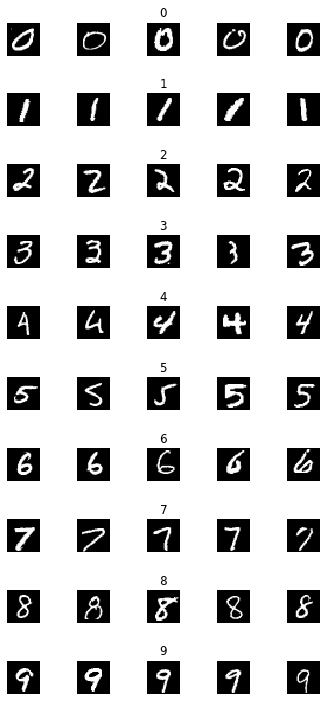

In [0]:
num_of_samples=[]
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


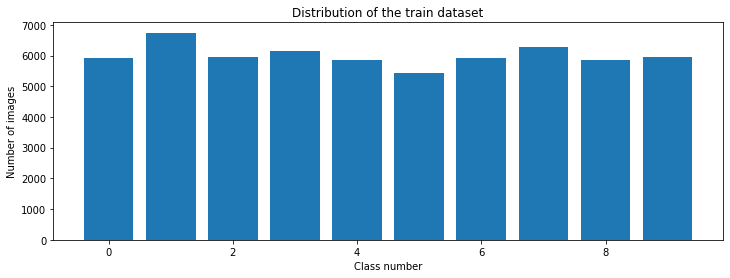

In [0]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255

In [0]:
#Define the leNet model function
def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [0]:
model = leNet_model()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [0]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1964 - acc: 0.9366 - val_loss: 0.0519 - val_acc: 0.9825
Epoch 2/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0477 - acc: 0.9851 - val_loss: 0.0453 - val_acc: 0.9877
Epoch 3/10
54000/54000 [==============================] - 1s 17us/step - loss: 0.0363 - acc: 0.9883 - val_loss: 0.0480 - val_acc: 0.9878
Epoch 4/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0295 - acc: 0.9905 - val_loss: 0.0411 - val_acc: 0.9885
Epoch 5/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0266 - acc: 0.9920 - val_loss: 0.0514 - val_acc: 0.9845
Epoch 6/10
54000/54000 [==============================] - 1s 18us/step - loss: 0.0239 - acc: 0.9925 - val_loss: 0.0413 - val_acc: 0.9880
Epoch 7/10
54000/54000 [==============================] - 1s 16us/step - loss: 0.0254 - acc: 0.9920 - val_loss: 0.0469 - val_acc:

Text(0.5, 0, 'epoch')

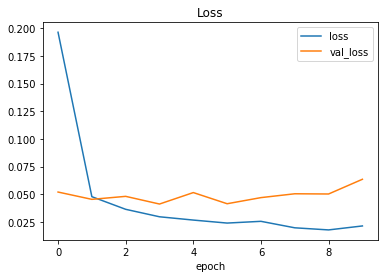

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

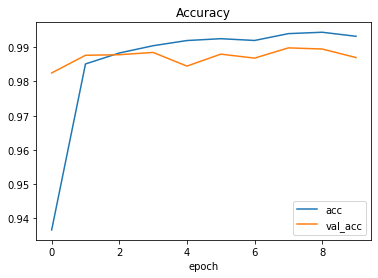

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [0]:
import requests
import cv2
from PIL import Image

<Response [200]>


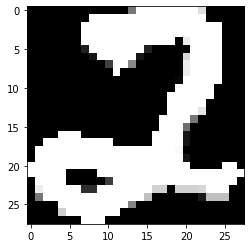

In [0]:
#NUMBER 2
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
print(response)
img = Image.open(response.raw)

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap=plt.get_cmap("gray"))
image = image/255
image = image.reshape(1, 28, 28, 1)

In [0]:
prediction = model.predict_classes(image)
print("predicted digit : ", str(prediction))

predicted digit :  [2]
